In [1]:
## Importing the libraries 
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [2]:
#Loading the dataset
insurance = pd.read_csv("files.csv")

In [3]:
### Printing the first five rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
### Printing the last five rows
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
### Printing the summary of the dataframe
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
### Finding the correlation between the columns
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
### Printing all the column names in the dataset
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
## Checking if there are any NULL values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
insurance['sex'] = labelencoder_y.fit_transform(insurance['sex'])

In [10]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
insurance["smoker_norm"]=map_smoking(insurance["smoker"])

In [11]:
nonnum_cols=[col for col in insurance.select_dtypes(include=["object"])]

In [12]:
def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
insurance["obese"]=map_obese(insurance["bmi"])

In [13]:
### Printing the first five rows of the updated dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese
0,19,0,27.900,0,yes,southwest,16884.92400,1,0
1,18,1,33.770,1,no,southeast,1725.55230,0,1
2,28,1,33.000,3,no,southeast,4449.46200,0,1
3,33,1,22.705,0,no,northwest,21984.47061,0,0
4,32,1,28.880,0,no,northwest,3866.85520,0,0


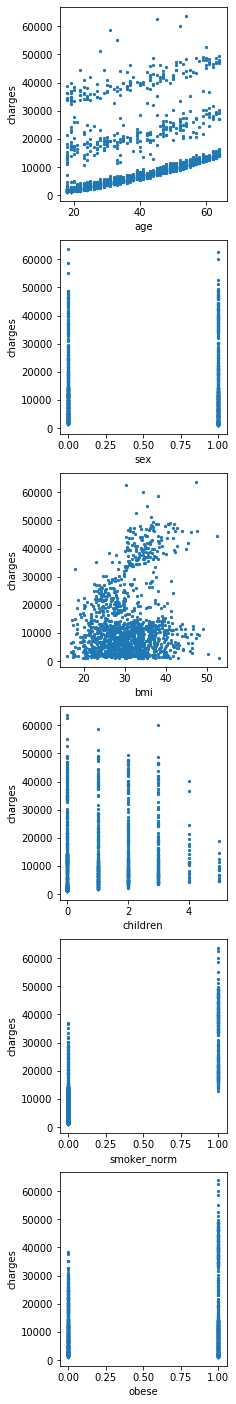

In [14]:
### Plotting the graphs using scatter plot
colnum=len(insurance.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in insurance.columns 
                          if i not in ["smoker","region","charges","sex_norm"]]):
    
    ax[ind].scatter(insurance[col],insurance.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

In [15]:
### Dropping the unwanted columns
insurance.drop('bmi', inplace=True, axis=1)
insurance.drop('smoker', inplace=True, axis=1 )
insurance.drop('region', inplace=True, axis=1 )


In [16]:
###Printing the updated dataset
insurance

,age,sex,children,charges,smoker_norm,obese
0,19,0,0,16884.92400,1,0
1,18,1,1,1725.55230,0,1
2,28,1,3,4449.46200,0,1
3,33,1,0,21984.47061,0,0
4,32,1,0,3866.85520,0,0
...,...,...,...,...,...,...
1333,50,1,3,10600.54830,0,1
1334,18,0,0,2205.98080,0,1
1335,18,0,0,1629.83350,0,1
1336,21,0,0,2007.94500,0,0


In [17]:
###Choosing the Dependent and Independent variables
# Independent Variables
x=insurance.iloc[:,[0,1,2,4,5]]
x

,age,sex,children,smoker_norm,obese
0,19,0,0,1,0
1,18,1,1,0,1
2,28,1,3,0,1
3,33,1,0,0,0
4,32,1,0,0,0
...,...,...,...,...,...
1333,50,1,3,0,1
1334,18,0,0,0,1
1335,18,0,0,0,1
1336,21,0,0,0,0


In [18]:
# Dependent Variable(target column)
y=insurance.iloc[:,3]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [19]:
## TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [20]:
insurance.describe()

,age,sex,children,charges,smoker_norm,obese
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,1.094918,13270.422265,0.204783,0.526906
std,14.049960,0.500160,1.205493,12110.011237,0.403694,0.499462
min,18.000000,0.000000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,0.000000,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,1.000000,1.000000,9382.033000,0.000000,1.000000
75%,51.000000,1.000000,2.000000,16639.912515,0.000000,1.000000
max,64.000000,1.000000,5.000000,63770.428010,1.000000,1.000000


In [21]:
## FEATURE SCALING

from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()


In [22]:
x_train

,age,sex,children,smoker_norm,obese
621,37,1,4,1,1
194,18,1,0,0,1
240,23,0,2,1,1
1168,32,1,2,0,1
1192,58,0,1,0,1
...,...,...,...,...,...
763,27,1,0,0,0
835,42,1,2,0,1
1216,40,1,0,0,0
559,19,1,0,0,1


In [23]:
x_train=sc.fit_transform(x_train)

In [24]:
x_train

array([[0.41304348, 1.        , 0.8       , 1.        , 1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.10869565, 0.        , 0.4       , 1.        , 1.        ],
       ...,
       [0.47826087, 1.        , 0.        , 0.        , 0.        ],
       [0.02173913, 1.        , 0.        , 0.        , 1.        ],
       [0.32608696, 0.        , 0.2       , 0.        , 0.        ]])

In [25]:
x_test=sc.transform(x_test)

x_test

array([[0.73913043, 1.        , 0.2       , 0.        , 1.        ],
       [0.63043478, 0.        , 0.2       , 0.        , 0.        ],
       [0.65217391, 1.        , 0.4       , 1.        , 1.        ],
       ...,
       [0.84782609, 1.        , 0.        , 0.        , 1.        ],
       [0.26086957, 0.        , 0.6       , 1.        , 1.        ],
       [0.60869565, 1.        , 0.6       , 0.        , 0.        ]])

In [26]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

In [27]:
## MODEL BUILDING
from sklearn.linear_model import LinearRegression
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred=lr.predict(x_test)
y_pred

array([13681.8053593 ,  8088.59306776, 36704.3489149 , 15531.92812004,
        8660.18883807,  4324.00917516,   221.91070129, 14317.73950075,
       10993.56932565,  9214.44364358,  5666.87453671,  9306.93508404,
        7065.77147542,  4057.49167256, 26128.21071448,  9758.16090606,
       10972.34952535,  7033.46500911,  6249.28241154, 28642.1461245 ,
       33167.59191256, 15145.04066914, 13219.76743276, 31231.50657165,
        5559.41759475,  8567.69739762,  2778.96468213, 11504.98012182,
        3546.08087639, 12343.09339474,  7201.10692522, 39065.88247181,
       15787.63351812, 13997.69573153, 25350.28241571,  3290.3754783 ,
       12598.79879282, 31139.01513119, 34647.89362571,  5037.19469406,
        4824.60786681,  3045.48218474, 29196.6754915 , 39261.40289575,
       28119.92322381,  6195.35173619,  9758.16090606,  6820.87818186,
        3741.60130033, 10645.6470486 ,  5804.31088831,  1831.29356544,
       31949.24989628, 37911.87882666, 14753.99982127,  7093.64998326,
      

In [29]:
## Testing for Accuracy
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7993018650961001

In [30]:
## Predicting and the result
lr.predict([[37,1,4,1,1]])

array([472365.83930837])

In [ ]:
#Saving our model into a file
import pickle
pickle.dump(lr,open('HIC.pkl','wb'))